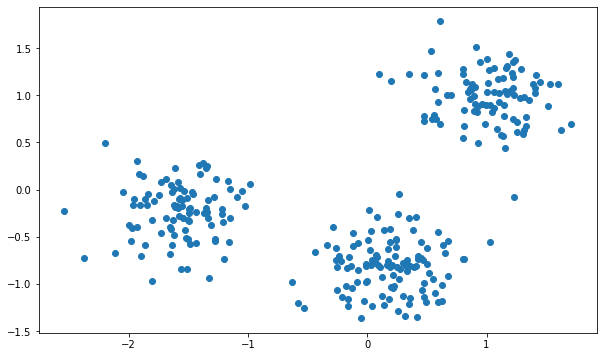

In [1]:
#How many clusters?

import sys
sys.path.append('datasets/')
import datasets as ds
points = ds.points
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

#You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a
#scatter plot of these points, and use the scatter plot to guess how many clusters there are.

#matplotlib.pyplot has already been imported as plt. In the IPython Shell:

#- Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
#- Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
#- Make a scatter plot by passing xs and ys to the plt.scatter() function.
#- Call the plt.show() function to show your plot.

#How many clusters do you see?

xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)
plt.show()

In [2]:
#Possible Answers

#2

#3*

#300

In [3]:
#NOTE: The scatter plot suggests that there are 3 distinct clusters.

In [4]:
#Clustering 2D points

import sys
sys.path.append('datasets/')
import datasets as ds
points = ds.points
new_points = ds.new_points

#From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now
#create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has
#been fit, you'll obtain the cluster labels for some new points using the .predict() method.

#You are given the array points from the previous exercise, and also an array new_points.

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
 2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
 1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
 0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
 0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
 2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
 2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
 0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
 0 2 2 1]


In [5]:
#NOTE: You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to
#inspect the clustering by just looking at the printed labels. A visualization would be far more useful.

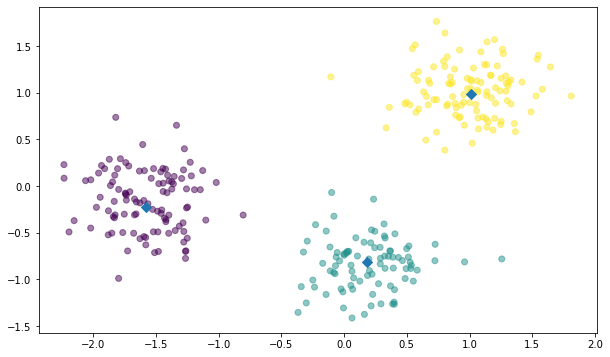

In [6]:
#Inspect your clustering

#Let's now inspect the clustering you performed in the previous exercise!

#A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their
#cluster labels.

# Import pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

In [7]:
#NOTE: The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can
#you evaluate the quality of a clustering?

D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


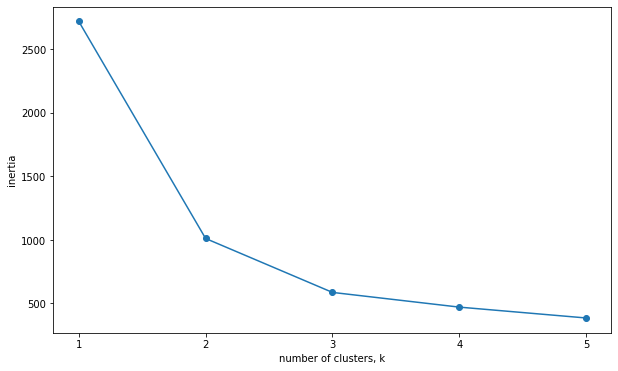

In [8]:
#How many clusters of grain?

import pandas as pd
df_grains = pd.read_csv('datasets/grains/seeds.csv', header=None)
samples = df_grains.drop(7, axis=1).values
plt.figure(figsize=(10, 6))

#In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are
#given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of
#grain. What's a good number of clusters in this case?

#KMeans and PyPlot (plt) have already been imported for you.

#This dataset was sourced from the UCI Machine Learning Repository.

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
#NOTE: The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this
#data.

In [10]:
#Evaluating the grain clustering

df_grains['varieties'] = df_grains[7]
df_grains.loc[df_grains['varieties'] == 1, 'varieties'] = 'Kama wheat'
df_grains.loc[df_grains['varieties'] == 2, 'varieties'] = 'Rosa wheat'
df_grains.loc[df_grains['varieties'] == 3, 'varieties'] = 'Canadian wheat'
varieties = df_grains['varieties'].to_list()

#In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In
#fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise,
#cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

#You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd)
#and KMeans have already been imported for you.

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


In [11]:
#NOTE: The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the
#type of data you are working with, the clustering may not always be this good. Is there anything you can do in such
#situations to improve your clustering?

In [12]:
#Scaling fish data for clustering

#You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such
#as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In
#order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a
#pipeline to standardize and cluster the data.

#These fish measurement data were sourced from the Journal of Statistics Education.

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [13]:
#NOTE: Now that you've built the pipeline, you'll use it in the next exercise to cluster the fish by their measurements.

In [14]:
#Clustering the fish data

df_fish = pd.read_csv('datasets/fish.csv', header=None)
samples = df_fish.drop(0, axis=1).values
species = df_fish[0].to_list()

#You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their
#measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

#As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every
#fish sample is given by the list species.

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0     0      0     13
3            0    17      0      0


In [15]:
#NOTE: It looks like the fish data separates really well into 4 clusters!

In [16]:
#Clustering stocks using KMeans

df_stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
movements = df_stocks.values

#In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the
#closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010
#to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading
#day.

#Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline.
#The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler()
#standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling
#to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

#KMeans and make_pipeline have already been imported for you.

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [17]:
#NOTE: Now that your pipeline has been set up, you can find out which stocks move together in the next exercise!

In [18]:
#Which stocks move together?

companies = df_stocks.index.to_list()

#In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices
#that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

#Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a
#KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the
#company names is available.

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels']))

    labels                           companies
48       0                              Toyota
7        0                               Canon
45       0                                Sony
34       0                          Mitsubishi
21       0                               Honda
50       1  Taiwan Semiconductor Manufacturing
51       1                   Texas instruments
33       1                           Microsoft
47       1                            Symantec
24       1                               Intel
17       1                     Google/Alphabet
9        2                   Colgate-Palmolive
31       2                           McDonalds
41       2                       Philip Morris
38       2                               Pepsi
28       2                           Coca Cola
26       3                      JPMorgan Chase
35       3                            Navistar
20       3                          Home Depot
55       3                         Wells Fargo
18       3   